In [1]:
import requests
from tqdm.auto import tqdm
from collections import defaultdict
import datetime

In [2]:
sber = '3529'
page = 1
num_per_page = 100
moscow = 1
url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={page}&per_page={num_per_page}'#&area={moscow}'
#результат лишь по 1 странице

In [3]:
res = requests.get(url)
vacancies = res.json()
num_pages = vacancies.get('pages')
num_pages

20

In [5]:
vacancies.keys()


dict_keys(['items', 'found', 'pages', 'per_page', 'page', 'clusters', 'arguments', 'alternate_url'])

In [6]:
vacancies.get('found')

6375

In [7]:
vacancies = res.json()
num_pages = vacancies.get('pages')
vacancy_ids = [d.get('id') for d in vacancies.get('items')]
vacancy_ids[0]

'49447342'

In [8]:
len(vacancy_ids)

100

In [14]:
all_vacancy_ids= []
for i in tqdm(range(vacancies.get('pages'))):
    url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={i}&per_page={num_per_page}&area={moscow}'
    res = requests.get(url)
    vacancies = res.json()
    vacancy_ids = [el.get('id') for el in vacancies.get('items')]
    all_vacancy_ids.extend(vacancy_ids)
len(all_vacancy_ids)

  0%|          | 0/20 [00:00<?, ?it/s]

2000

In [11]:
vac_id = 43326020
url = f'https://api.hh.ru/vacancies/{vac_id}'
res = requests.get(url)
vacancy = res.json()


In [12]:
# Задание вытащить все вакансии СБЕРа с ХХ (у апи есть ограничение в 2000, подумайте как его обойти)
# Вытащите все полные описания этих вакансий по запросу с https://api.hh.ru/vacancies/43326020 где 43326020 id вакансии
# Создайте аналогичный vacancy DataFrame только добавьте поле skills
# Переведите даты публикаций в datetime
# Постройте график опубликованных вакансий по датам
# Переведите даты в дни недели, и определите день недели, в который больше всего публикуют вакансий
# Найдите те вакансии с использованием python, которые вам интересны
# Определите по полю skills какие навыки больше всего востребованы для этих вакансий, и
# Постройте график наиболее востребованных вакансий

In [13]:
vacancy.keys()

dict_keys(['id', 'premium', 'billing_type', 'relations', 'name', 'insider_interview', 'response_letter_required', 'area', 'salary', 'type', 'address', 'allow_messages', 'site', 'experience', 'schedule', 'employment', 'department', 'contacts', 'description', 'branded_description', 'vacancy_constructor_template', 'key_skills', 'accept_handicapped', 'accept_kids', 'archived', 'response_url', 'specializations', 'professional_roles', 'code', 'hidden', 'quick_responses_allowed', 'driver_license_types', 'accept_incomplete_resumes', 'employer', 'published_at', 'created_at', 'negotiations_url', 'suitable_resumes_url', 'apply_alternate_url', 'has_test', 'test', 'alternate_url', 'working_days', 'working_time_intervals', 'working_time_modes', 'accept_temporary'])

In [15]:
# Вытащите все полные описания этих вакансий по запросу с https://api.hh.ru/vacancies/43326020 где 43326020 id вакансии

tab_dict=defaultdict(list)
for vid in tqdm(all_vacancy_ids):
    url = f'https://api.hh.ru/vacancies/{vid}'
    res = requests.get(url)
    vacancy = res.json()
    tab_dict['id'].append(vacancy.get('id'))
    tab_dict['name'].append(vacancy.get('name'))
    tab_dict['published_at'].append(vacancy.get('published_at'))
    tab_dict['description'].append(vacancy.get('description'))
    skills=','.join([x.get('name') for x in vacancy.get('key_skills')])
    tab_dict['key_skills'].append(skills)

  0%|          | 0/2000 [00:00<?, ?it/s]

In [18]:
import pandas as pd

In [84]:
# Создайте аналогичный vacancy DataFrame только добавьте поле skills
vacancies_dtfr = pd.DataFrame.from_dict(tab_dict)
vacancies_dtfr.description=vacancies_dtfr.description.str.replace('<p>|</p>|<strong>|</strong>|<ul>|</ul>|<li>|</li>','')

vacancies_dtfr.head()

<ipython-input-84-de6f2ceb0b95>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  vacancies_dtfr.description=vacancies_dtfr.description.str.replace('<p>|</p>|<strong>|</strong>|<ul>|</ul>|<li>|</li>','')


,id,name,published_at,description,key_skills
0,43635983,"Клиентский менеджер со знанием таджикского, уз...",2021-11-08T18:21:40+0300,"Клиентский менеджер ― специалист, который прод...",
1,46943947,Клиентский менеджер прямых продаж,2021-10-11T11:10:21+0300,У каждого нашего зарплатного клиента – компани...,
2,44951547,Клиентский менеджер,2021-10-06T20:09:35+0300,"Клиентский менеджер ― специалист, который прод...","Активные продажи,Прямые продажи"
3,49259518,Стажер по направлению Data Science от SBERSEASONS,2021-10-29T19:39:59+0300,Любишь работать с данными и хочешь применить с...,"Python,SQL,MS PowerPoint,Data Analysis"
4,49287280,Помощник руководителя,2021-11-01T13:55:06+0300,"Сбер — крупнейший банк в России, Центральной и...","Планирование рабочего дня руководителя,Организ..."


In [94]:
# Переведите даты публикаций в datetime
vacancies_dtfr.published_at=pd.to_datetime(rn.published_at).dt.date
vacancies_dtfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            2000 non-null   object
 1   name          2000 non-null   object
 2   published_at  2000 non-null   object
 3   description   2000 non-null   object
 4   key_skills    2000 non-null   object
dtypes: object(5)
memory usage: 78.2+ KB


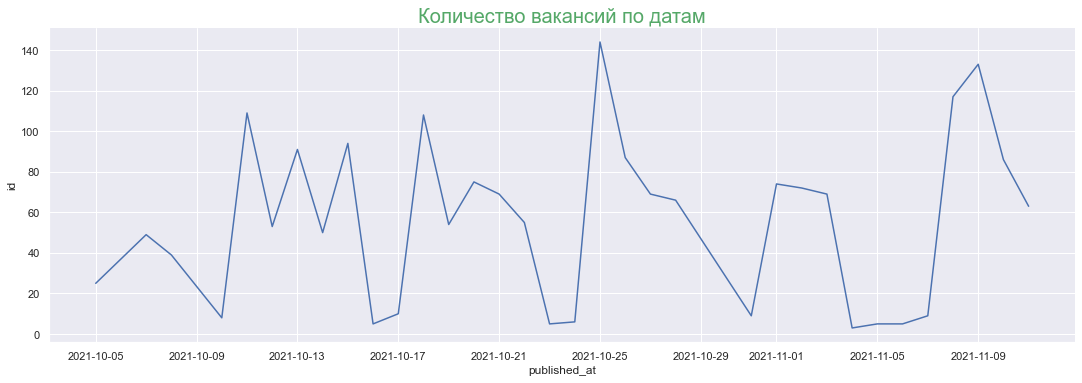

In [111]:
# Постройте график опубликованных вакансий по датам  
import seaborn as sns
import matplotlib.pyplot as plt
vacs=vacancies_dtfr.groupby('published_at')['id'].count().reset_index()


sns.set(style='darkgrid')  

sns.relplot(
   
    x='published_at', 
    y='id', 
    data=vacs, 
    kind='line',
    aspect=3
)
plt.title('Количество вакансий по датам', size=20, color='g');

In [99]:
# Переведите даты в дни недели, и определите день недели, в который больше всего публикуют вакансий
vacancies_dtfr['weekday_num']=vacancies_dtfr.published_at.apply(lambda x:x.strftime('%A'))
vacancies_dtfr.head()
vacancies_dtfr.groupby('weekday_num')['id'].count().sort_values(ascending=False)

weekday_num
Monday       552
Wednesday    427
Tuesday      424
Thursday     300
Friday       240
Sunday        42
Saturday      15
Name: id, dtype: int64

In [98]:
# Найдите те вакансии с использованием python, которые вам интересны
t1 = vacancies_dtfr.name.str.lower().str.contains('финан|портф')
t2 = vacancies_dtfr.name.str.lower().str.contains('аналитик|analyst')
t3=vacancies_dtfr.key_skills.str.lower().str.contains('python')

top_vacancies=vacancies_dtfr[t1 &t2 &t3]
top_vacancies.reset_index()

,index,id,name,published_at,description,key_skills,weekday_num
0,25,48918980,Портфельный аналитик,2021-10-18,Наша команда занимается управлением портфелем ...,"SQL,Python,Математическая статистика,MS PowerP...",Monday
1,730,49344636,Аналитик по количественным финансам (AI/ML),2021-11-03,"Обязанности: Генерация идей, сбор и организац...","Python,Математическая статистика,Английский яз...",Wednesday
2,1527,47768798,Аналитик в центр портфельного управления розни...,2021-10-22,Сбер приглашает аналитиков в центр портфельног...,"SQL,Python,Математическая статистика,Аналитиче...",Friday


In [167]:
#Определите по полю skills какие навыки больше всего востребованы для этих вакансий, и

t4=vacancies_dtfr.key_skills.str.lower().str.contains('python')

python_vacancies=vacancies_dtfr[t4]
python_vacancies.reset_index()

skills=python_vacancies.key_skills.apply(lambda x: x.split(','))


skills_all=pd.DataFrame(sum(skills, []),columns =['skills']).reset_index()
skills_all

skills_all.groupby('skills')['index'].count().sort_values(ascending=False).drop('Python').nlargest(5)






skills
SQL           136
Linux          71
Git            62
PostgreSQL     46
Hadoop         39
Name: index, dtype: int64

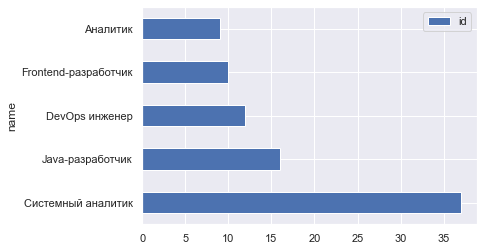

In [174]:
# Постройте график наиболее востребованных вакансий

vacs=vacancies_dtfr.groupby('name')['id'].count().reset_index()



vacs.nlargest(5, 'id').set_index('name').plot(kind='barh');